
# MNIST - Solving a Classification problem

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [125]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [126]:
## suppress warnings
import warnings; warnings.simplefilter('ignore')

In [127]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
    
def plot_digit_label(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()

In [128]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

# Fetch the MNIST

In [129]:
#from sklearn.datasets import fetch_mldata
#mnist = fetch_mldata('MNIST original')
#mnist

In [ ]:
#Alternate method of loading data 

X=np.loadtxt('/Data/X.txt')
y=np.loadtxt('/Data/y.txt')

In [130]:
#X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [131]:
import pandas as pd
tdf= pd.DataFrame(X[:5])
tdf['y']=[0,1,2,3,4]
tdf

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [132]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [133]:
y.shape

(70000,)

In [134]:
y

array([0., 0., 0., ..., 9., 9., 9.])

## Get a Sample of the Digits

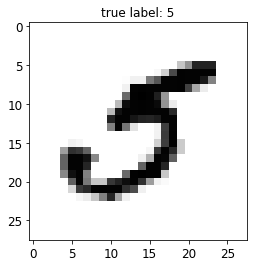

In [141]:
#some_digit_image

plot_digit_label(X, y, 36000)

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)


In [142]:
y[36000]

5.0

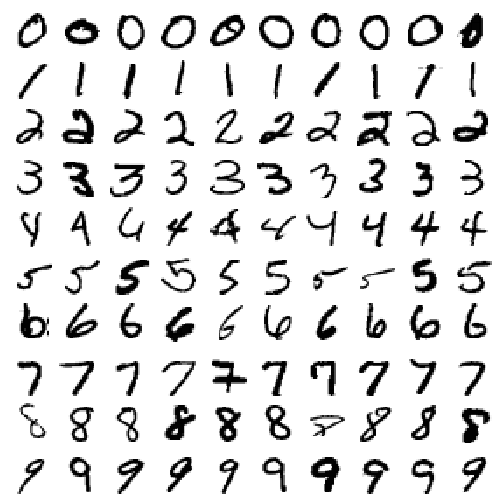

In [143]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)

plt.show()

##  Split test Train

In [144]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [146]:
X_test.shape

(10000, 784)

### Lets shuffle it

In [147]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [148]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


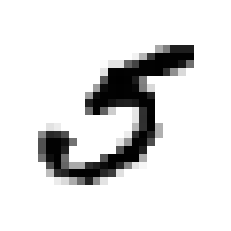

In [149]:
plot_digit(some_digit)

# Random Forest Classifier

In [150]:
%%time
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,y_train_5)


Wall time: 41 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [151]:
y_train_pred_forest = forest_clf.predict(X_train)
y_test_pred_forest = forest_clf.predict( X_test)

#precision_score(y_train_5, y_train_pred_forest)

In [152]:
#Print the CM

cm = confusion_matrix(y_test_5, y_test_pred_forest)
print(cm)

[[9105    3]
 [ 124  768]]


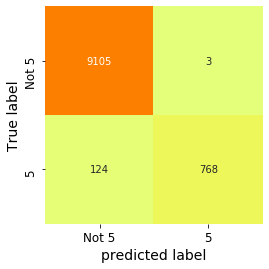

In [153]:
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap="Wistia",
            xticklabels=['Not 5','5'] ,
            yticklabels=['Not 5', '5 '])
plt.ylabel('True label')
plt.xlabel('predicted label');

In [154]:
# Getting classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_5,y_test_pred_forest,target_names=['Non 5','5s']))

              precision    recall  f1-score   support

       Non 5       0.99      1.00      0.99      9108
          5s       1.00      0.86      0.92       892

    accuracy                           0.99     10000
   macro avg       0.99      0.93      0.96     10000
weighted avg       0.99      0.99      0.99     10000



In [155]:
# Calculating Recall, etc
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print('TEST DATA RESULTS - RF')
accuracy = (TP+TN) / float(TP+TN+FN +FP)
print('Accuracy ',accuracy)
sensitivity = TP / float(FN + TP)
print('Sensitivity or recall:',sensitivity)
precision = TP / float(TP + FP)
print('precision',precision)
specificity = TN / (TN + FP)
print('specificity',specificity)
print('Size ',float(TP+TN+FN + FP))

TEST DATA RESULTS - RF
Accuracy  0.9873
Sensitivity or recall: 0.8609865470852018
precision 0.9961089494163424
specificity 0.9996706192358367
Size  10000.0


## Visualize the CM

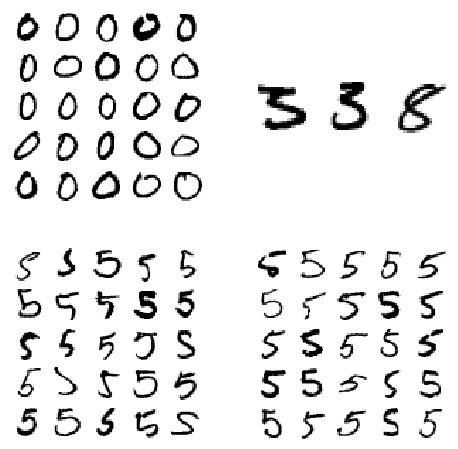

In [156]:
cl_a, cl_b = 1,0
#TP
X_aa = X_test[(y_test_5 == cl_a) & (y_test_pred_forest == cl_a)]
#FN
X_ab = X_test[(y_test_5 == cl_a) & (y_test_pred_forest == cl_b)]
#FP
X_ba = X_test[(y_test_5 == cl_b) & (y_test_pred_forest == cl_a)]
#TN
X_bb = X_test[(y_test_5 == cl_b) & (y_test_pred_forest == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_bb[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ba[:25], images_per_row=5)

plt.subplot(223); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_aa[:25], images_per_row=5)

plt.show()

#   Congratulations - End of Excerise

In [ ]:
from sklearn.metrics import precision_score, recall_score

print('precision on training ', precision_score(y_train_5, y_train_pred_forest))
print('precision on test ', precision_score(y_test_5, y_test_pred_forest))

print('recall on training ', recall_score(y_train_5, y_train_pred_forest))
print('recall on test ', recall_score(y_test_5, y_test_pred_forest))


print('f1 on training ', f1_score(y_train_5, y_train_pred_forest))
print('f1 on test ', f1_score(y_test_5, y_test_pred_forest))

# Multiclass classification - using Random Forest


In [ ]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

In [ ]:
forest_clf.predict_proba([some_digit])

In [ ]:
y_train_pred_forest = forest_clf.predict(X_train)
y_test_pred_forest = forest_clf.predict( X_test)

In [ ]:
matrix=confusion_matrix(y_test, y_test_pred_forest)
matrix

In [ ]:
ok=0
for i in range(0,10):
    ok=ok+matrix[i,i]

print('Accuracy' , ok/10000)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report( y_test,y_test_pred_forest))

In [ ]:
import seaborn as sns
sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.ylabel('True label')
plt.xlabel('predicted label');

In [ ]:
cl_a, cl_b = 4, 9
X_aa = X_test[(y_test == cl_a) & (y_test_pred_forest == cl_a)]
X_ab = X_test[(y_test == cl_a) & (y_test_pred_forest == cl_b)]
X_ba = X_test[(y_test == cl_b) & (y_test_pred_forest == cl_a)]
X_bb = X_test[(y_test == cl_b) & (y_test_pred_forest == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

plt.show()

# Additional material

# Multiclass classification - using SGD Classifier

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

### Now the scores are of 10 classes

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

In [ ]:
np.argmax(some_digit_scores)

In [ ]:
sgd_clf.classes_

In [ ]:
sgd_clf.classes_[5]

## One vs One Classifiers

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

In [ ]:
len(ovo_clf.estimators_)

## Improve Scores Using Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

## Confusion Matrix

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.Blues)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.Blues)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

## printing out the errors

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()